## Preparação

In [1]:
#importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture 
% matplotlib inline


In [2]:
#carregar o dataset
bol_soma = pd.read_csv('data/BOL_SOMA.csv')
especialistas = pd.read_csv('data/Especialistas.csv')

In [3]:
#gerar o dataset resumido
bol_soma_resumido = bol_soma.copy()
info_cols = [x for x in range(42, 70)]
bol_soma_resumido.drop(bol_soma_resumido.columns[info_cols],axis=1,inplace=True)

In [4]:
#pré-processar o dataset de gabarito
gabarito = especialistas.sort_values(by='Avaliacao_Media', ascending=False)
gabarito.index = gabarito.index + 1
gabarito.drop(columns=['Proposta'], inplace=True)

In [5]:
#definir tamanho da resposta
resp_size = 21

In [6]:
def evaluate(dataset, gabarito):
    hit = 0
    for proposta in n_result_cut.index:
        if(proposta in gabarito_cut.index):
            print(f'Hit on {proposta}')
            hit += 1
    print(f'{hit} hits')

## Método N

In [7]:
n_result = pd.DataFrame(
    [[bol_soma_resumido[f'{x}'].sum()]for x in range(1, 43)], 
    columns=['avaliacao'], 
    index=range(1, 43)).sort_values(by='avaliacao', ascending=False)

## Método P

In [8]:
#Normalizando o dataframe
bol_std = StandardScaler().fit_transform(bol_soma)

[2.71303298e-01 1.07350389e-01 1.00647019e-01 7.24177641e-02
 6.34714576e-02 5.22895495e-02 4.28588023e-02 3.41191085e-02
 3.17075633e-02 3.11017179e-02 2.54307887e-02 2.35714600e-02
 2.22300608e-02 1.85347239e-02 1.66728966e-02 1.57068133e-02
 1.32921713e-02 1.20744111e-02 1.10872299e-02 1.05335381e-02
 9.00898008e-03 8.00078547e-03 6.58947149e-03 1.80980535e-21
 1.05287957e-21 7.05925851e-22 5.92794424e-22 4.03095042e-22]


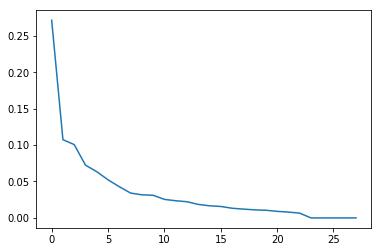

In [9]:
#Rodando o PCA
pca = PCA()
matriz = bol_soma.values[:, 42:70]
matriz_std = StandardScaler().fit_transform(matriz)
pca.fit(matriz_std)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

In [10]:
#Running PCA and reconstructing
bol_pca = pca.transform(matriz_std)
bol_reconstruct = pca.inverse_transform(bol_pca)

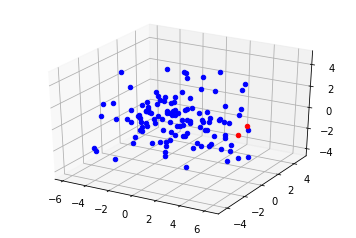

In [12]:
#Running Spectral Clustering
spectralCluster = SpectralClustering(n_clusters=2).fit(bol_pca)
classes = spectralCluster.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for index, row in enumerate(bol_pca):
    if classes[index] == 0:
        color = 'b'
    else:
        color = 'r'
    
    ax.scatter(row[0], row[1], row[2], color=color)

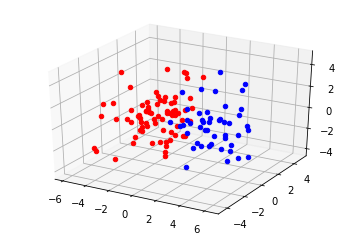

In [20]:
#Running K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(bol_pca)
classes = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for index, row in enumerate(bol_pca):
    if classes[index] == 0:
        color = 'b'
    else:
        color = 'r'
    
    ax.scatter(row[0], row[1], row[2], color=color)




In [34]:
bol_soma_resumido['classe'] = np.asarray(classes)
p_result = bol_soma_resumido.groupby('classe').sum().transpose().rename(columns={0:'avaliacao_0', 1:'avaliacao_1'})

In [35]:
print(p_result)

classe  avaliacao_0  avaliacao_1
1                 0          -10
2                -3           -5
3                -5           -4
4                -1           -1
5                -5          -10
6               -13          -25
7               -19          -15
8               -14          -17
9               -11          -13
10               -4           -8
11               -3          -10
12               -5           -7
13               -7          -17
14              -15          -22
15               -1           -4
16               -5           -8
17               -4           -4
18               -1           -1
19              -10          -13
20              -10          -18
21               -5          -14
22              -15          -22
23              -23          -31
24               -5           -9
25               -2           -4
26               -5          -14
27              -21          -33
28              -11          -17
29              -10          -11
30        

In [36]:
print(n_result)

    avaliacao
4          -2
18         -2
15         -5
36         -6
25         -6
31         -8
2          -8
17         -8
3          -9
1         -10
37        -10
35        -11
10        -12
12        -12
32        -13
11        -13
16        -13
30        -13
24        -14
5         -15
39        -18
40        -18
21        -19
26        -19
29        -21
19        -23
9         -24
13        -24
34        -26
42        -26
28        -28
20        -28
8         -31
41        -32
33        -33
7         -34
14        -37
22        -37
6         -38
38        -40
27        -54
23        -54
